ExampleCo case study is a time series predictive maintenance problem. The two datasets provide information about the readings of Machine features at given timestamps and the status- error/warning at respective timestamps.

First, considering the RMS Data.

In [9]:
import pandas as pd
import numpy as np
train_data_rms = pd.read_csv("data/train/unit0000_rms.csv", index_col='timestamp')
train_data_alarm= pd.read_csv("data/train/unit0000_alarms.csv", header=None, names = ["timestamp", "message"], 
                    index_col = "timestamp")


In [10]:
df=train_data_rms.describe()
df

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
count,9.171500e+04,9.171500e+04,9.171500e+04,9.171500e+04,9.171500e+04
mean,-8.111152e+46,-4.431337e+60,-1.387827e+56,-6.640742e+69,-1.937422e+48
std,2.456380e+49,1.903274e+63,4.202968e+58,2.011115e+72,5.867349e+50
min,-7.439020e+51,-5.565298e+65,-1.272847e+61,-6.090557e+74,-1.776896e+53
25%,1.017725e+03,2.311319e+02,3.239347e+01,1.179731e+02,6.489677e+01
50%,1.066347e+03,2.667104e+02,3.944687e+01,1.564521e+02,7.799157e+01
75%,1.106721e+03,2.993994e+02,4.607173e+01,1.978223e+02,9.086132e+01
max,7.978110e+44,1.500194e+65,1.555360e+55,3.117856e+55,1.710299e+40


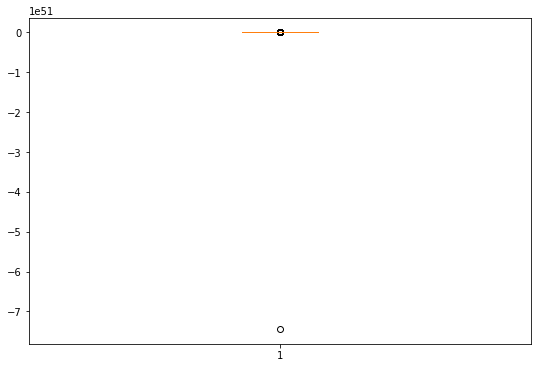

In [11]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(train_data_rms.rpm)

The above box plot shows that the data has a lot of outliers, and because of this the average, standard deviation and other metrics are not able to give accurate results. Hence we need to clean the nonsensical data and at the same time it shouldnt be omitting or deleting any rows in order to get pragmatic and accurate results.

In [12]:
l1 = -0.5*df.iloc[5]
l2 = 2*df.iloc[6] 
for r in range(len(train_data_rms)):
        m = train_data_rms.iloc[r] < l1 
        h = train_data_rms.iloc[r] > l2
        if max(m):
            train_data_rms.iloc[r] = df.iloc[4]
        elif max(h):
            train_data_rms.iloc[r] = df.iloc[6]

In [13]:
train_data_rms.dropna()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
timestamp,,,,,
2003-12-13 19:56:43.777979848,0.150438,-0.059544,0.045503,5.084823,0.019528
2003-12-13 20:07:32.457298714,0.511660,0.627101,0.208669,7.334172,2.081454
2003-12-13 20:13:43.182783330,0.824233,1.732618,0.286401,8.843053,3.485346
2003-12-13 20:27:19.295198297,1.506626,3.115258,0.483992,11.749493,6.041188
2003-12-13 20:35:08.719032171,2.034869,3.923323,0.851620,12.947061,7.309662
2003-12-13 20:47:57.477942272,2.245686,4.606746,1.020820,15.206576,9.259320
2003-12-13 20:57:15.249587191,2.345136,5.118045,0.971889,16.682142,10.885998
2003-12-13 21:05:28.929883015,2.582276,5.090509,0.896352,17.758511,11.666615
2003-12-13 21:18:31.994522108,2.671419,5.408424,0.941260,19.572649,13.350347


In [14]:
train_data_rms.describe()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
count,91715.000000,91715.000000,91715.000000,91715.000000,91715.000000
mean,948.714947,246.529339,37.006367,154.434326,77.266883
std,347.535358,77.598753,11.504454,46.531077,17.664151
min,-65.140543,-108.335686,-19.535283,-0.044027,-0.776206
25%,1017.724755,231.131877,32.393465,117.973113,64.896767
50%,1066.493317,266.444795,39.355073,155.789700,77.791267
75%,1106.721477,299.399431,46.071726,197.335105,90.681142
max,1800.338913,402.604421,56.456321,330.756636,181.655086


In this boxplot we can see that all nonsensical data has been removed and it makes more sense to use this data for further modelling

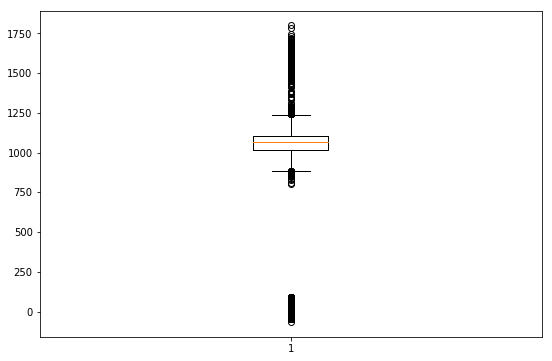

In [15]:

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(train_data_rms.rpm)

Following is the distribution of all the features of train data for 1 unit

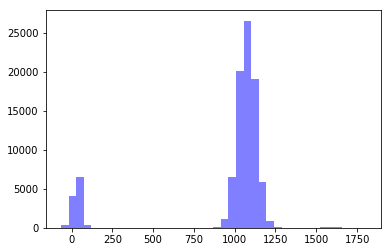

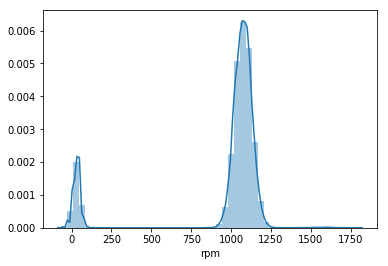

In [16]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

num_bins = 40
n, bins, patches = plt.hist(train_data_rms.rpm, num_bins, facecolor='blue', alpha=0.5)
plt.show()
sns.distplot(train_data_rms.rpm);

In [17]:
sns.set(color_codes=True)

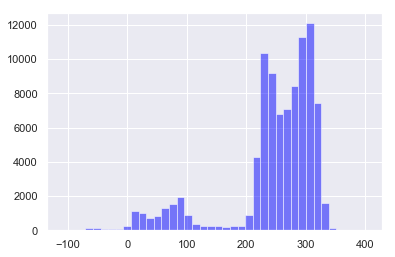

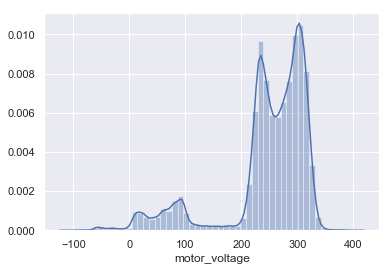

In [18]:
num_bins = 40
n, bins, patches = plt.hist(train_data_rms.motor_voltage, num_bins, facecolor='blue', alpha=0.5)
plt.show()
sns.distplot(train_data_rms.motor_voltage);

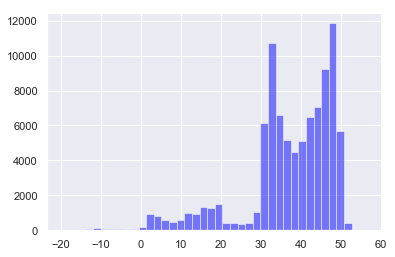

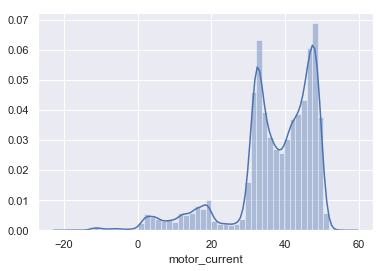

In [19]:
num_bins = 40
n, bins, patches = plt.hist(train_data_rms.motor_current, num_bins, facecolor='blue', alpha=0.5)
plt.show()
sns.distplot(train_data_rms.motor_current);

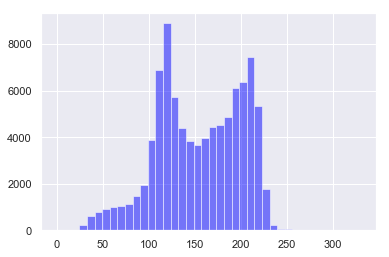

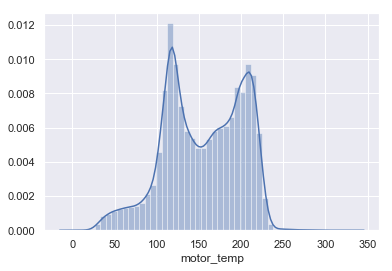

In [20]:
num_bins = 40
n, bins, patches = plt.hist(train_data_rms.motor_temp, num_bins, facecolor='blue', alpha=0.5)
plt.show()

sns.distplot(train_data_rms.motor_temp);

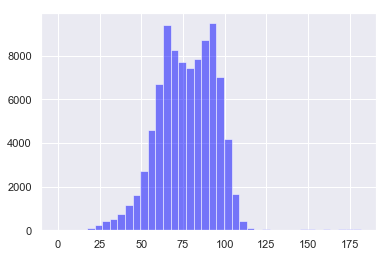

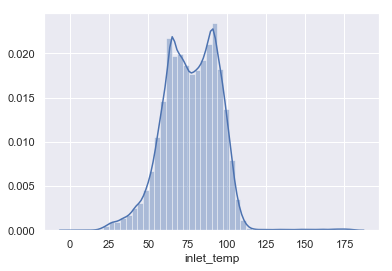

In [21]:
num_bins = 40
n, bins, patches = plt.hist(train_data_rms.inlet_temp, num_bins, facecolor='blue', alpha=0.5)
plt.show()

sns.distplot(train_data_rms.inlet_temp);

With the help of above graphs we can see that there is a need to normalize and standardize the data

In [22]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        std_value = df[feature_name].std()
        mean_value = df[feature_name].mean()
        result[feature_name] = (df[feature_name] - mean_value) / (std_value)
    return result

In [23]:
def standardize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
# df_2= normalize(train_data_rms)
# df_2.head()

In [ ]:
# df_3=standardize(df_2)
# df_3.head()

Model1- kmeans clustering- Unsupervised Learning

In [24]:
from sklearn.cluster import KMeans
import os
clus = KMeans(n_clusters = 2, init = "k-means++")

new_data = []
k = 0
os.chdir(r"C:\Users\rudha\OneDrive\Desktop\Tagup\challenges\data-science\data\train")
# reading in the data
# Replace with directory to training set
for file in os.listdir(r"C:\Users\rudha\OneDrive\Desktop\Tagup\challenges\data-science\data\train"):
    if file.endswith("_rms.csv"):
        df = pd.read_csv(file, index_col='timestamp')
        desc = df.describe()
        
        l1 = -0.5*df.iloc[5]
        l2 = 2*df.iloc[6] 
        for r in range(len(df)):
            m = df.iloc[r] < l1 
            h = df.iloc[r] > l2
            if max(m):
                df.iloc[r] = df.iloc[4]
            elif max(h):
                df.iloc[r] = df.iloc[6]
        length = len(df)
        df = df.iloc[(length-450):length]
        new_data.append(df)
# new_data_fit=pd.DataFrame(normalize(new_data))     
# new_data_fit = standardize(new_data_fit)
# clus.fit(new_data_fit)

# df = pd.DataFrame()
# pred = []

In [25]:
df=pd.DataFrame(df)
df = standardize(df)
# # # new_data_fit =pd.DataFrame(standardize(new_data_fit))
# # # clus.fit(new_data_fit)

# # # df = pd.DataFrame()
# # # pred = []
df.describe()


,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.913333,0.913333,0.913333,0.913333,0.913333
std,0.281659,0.281659,0.281659,0.281659,0.281659
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
clus.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
# Replace with directory to test set
pred=[]
os.chdir(r"C:\Users\rudha\OneDrive\Desktop\Tagup\challenges\data-science\data\test")
for file in os.listdir(r"C:\Users\rudha\OneDrive\Desktop\Tagup\challenges\data-science\data\test"):
    if file.endswith("_rms.csv"):
        test = pd.read_csv(file, index_col='timestamp')
        desc = test.describe()
        
        l1 = -0.5*df.iloc[5]
        l2 = 2*df.iloc[6] 
        for r in range(len(df)):
            m = df.iloc[r] < l1 
            h = df.iloc[r] > l2
            if max(m):
                df.iloc[r] = df.iloc[4]
            elif max(h):
                df.iloc[r] = df.iloc[6]
        length = len(df)
        df = df.iloc[(length-450):length]
        pred.append(df)
prediction = clus.predict(df)

C:\Users\rudha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rudha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


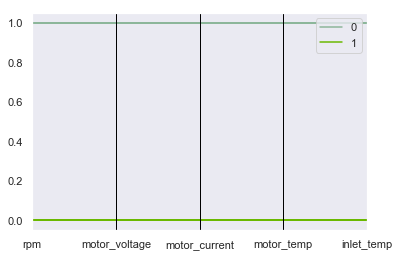

In [28]:
df['cluster'] = prediction
pd.tools.plotting.parallel_coordinates(df, 'cluster')

In [29]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

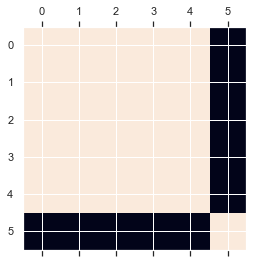

In [30]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [31]:
df.describe()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp,cluster
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.913333,0.913333,0.913333,0.913333,0.913333,0.086667
std,0.281659,0.281659,0.281659,0.281659,0.281659,0.281659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualizing the results of kmeans

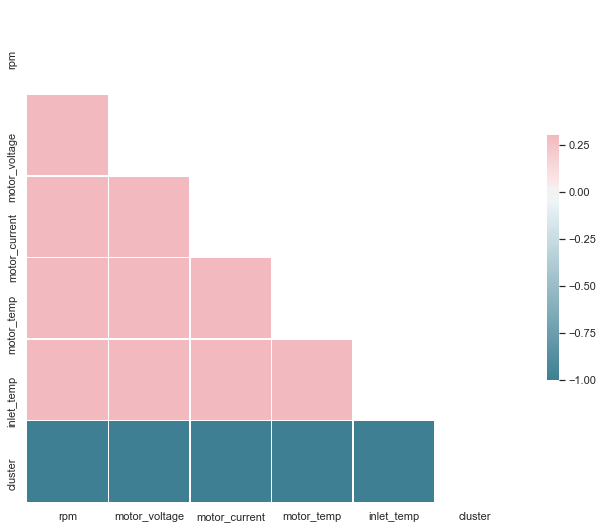

In [32]:
#diagonal correlation matrix
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Model2-Neural Networks-Supervised Learning
--Trying to model and predict this data with nn.

In [33]:
df12=(df.rpm).transpose()
df12=pd.DataFrame(df12)
df12

,rpm
timestamp,
2005-04-08 16:15:20.530557838,1.0
2005-04-08 16:26:28.444810181,1.0
2005-04-08 16:37:54.845086317,1.0
2005-04-08 16:46:25.824524593,1.0
2005-04-08 16:55:53.929205294,1.0
2005-04-08 17:04:18.428349805,1.0
2005-04-08 17:14:57.481030521,1.0
2005-04-08 17:27:37.084343965,1.0
2005-04-08 17:35:32.045516732,1.0


In [34]:
y_train = pd.DataFrame(index = range(450), columns = range(6))
for x in range(20):
    y_train.iloc[x] = 1

In [35]:
new_df = np.array(df)

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [38]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 213, init = 'uniform', activation = 'relu', input_dim = 450))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 213, init = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Fitting the ANN to the Training set
classifier.fit(new_df, batch_size = 5, nb_epoch = 500)

# # y_pred = classifier.predict(X_test)
# # y_pred = (y_pred > 0.5)


Was difficult to Model Artificial Neural Networks wih the data for all units, with all features and hence tried a statistical model- Auto Regressive Integrated Moving Average 

In [39]:
#ARIMA
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [40]:

os.chdir(r"C:\Users\rudha\OneDrive\Desktop\Tagup\challenges\data-science\data\train")
# reading in the data
# Replace with directory to training set
for file in os.listdir(r"C:\Users\rudha\OneDrive\Desktop\Tagup\challenges\data-science\data\train"):
    if file.endswith("_rms.csv"):
        series = read_csv(file, header=0, parse_dates=[0], index_col=0, squeeze=True)

                                    rpm  motor_voltage  motor_current  \
timestamp                                                               
2004-10-24 17:25:20.667465051 -0.140356       0.021297       0.010945   
2004-10-24 17:36:56.388776059  0.955078       1.830715       0.194279   
2004-10-24 17:45:43.724365015  2.029690       3.963378       0.889747   
2004-10-24 17:55:16.150658341  3.153888       6.026689       1.225913   
2004-10-24 18:06:22.448277223  3.970032       7.756670       1.643716   

                               motor_temp  inlet_temp  
timestamp                                              
2004-10-24 17:25:20.667465051    4.956142    0.026155  
2004-10-24 17:36:56.388776059    7.724988    2.380627  
2004-10-24 17:45:43.724365015    9.825663    4.381561  
2004-10-24 17:55:16.150658341   12.562210    6.282326  
2004-10-24 18:06:22.448277223   15.068509    8.243205  


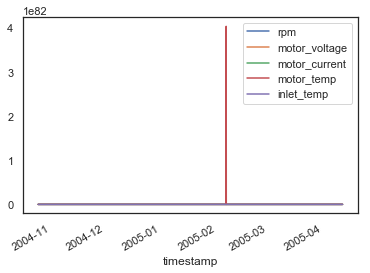

In [41]:
print(series.head())
series.plot()
pyplot.show()

C:\Users\rudha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


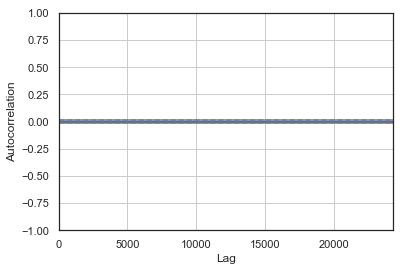

In [42]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [45]:
#arima statistical models
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

The data provided was a little complicated to deal within a stipulated time frame.

So, I studied the data, tried to find the comm error, identified the anomalies and successfully removed it, applied unsupervised Learning- Kmeans clustering to it, visualized the results.
Tried supervised learning model- NN, and statistical model- ARIMA.

I have other ideas in mind for solving this problem- like to create individual dataframes for all the unit 'csv' and then append it into the models, encoding the alarms csv and joining it with the rms csv to make more sense and to get a clear picture about the monitoring system, trying more models and blending it by using ensemble modelling approach.